In [3]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
!pip install wget
import wget

In [4]:
if not os.path.exists('./tmp/cats-and-dogs.zip'):
    url = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip'
    filename = wget.download(url)

In [5]:
def extract_zip():
    with zipfile.ZipFile('cats-and-dogs.zip', 'r') as zip_ref:
        zip_ref.extractall('./tmp/')

In [6]:
if not os.path.exists('./tmp/cats-and-dogs.zip'):
    extract_zip()

In [9]:
print(len(os.listdir('./tmp/PetImages/Cat/')))
print(len(os.listdir('./tmp/PetImages/Dog/')))

12501
12501


In [18]:
os.mkdir('./tmp/cats-v-dogs')
os.mkdir('./tmp/cats-v-dogs/training')
os.mkdir('./tmp/cats-v-dogs/testing')
os.mkdir('./tmp/cats-v-dogs/training/cats')
os.mkdir('./tmp/cats-v-dogs/training/dogs')
os.mkdir('./tmp/cats-v-dogs/testing/cats')
os.mkdir('./tmp/cats-v-dogs/testing/dogs')


In [19]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "./tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "./tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "./tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "./tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "./tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "./tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [20]:
print(len(os.listdir('./tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('./tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('./tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('./tmp/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
TRAINING_DIR = "./tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "./tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [24]:
# Note that this may take some time.
history = model.fit(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/50
 58/225 [======>.......................] - ETA: 52s - loss: 0.8539 - acc: 0.5645

C:\Users\SINA\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\SINA\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\SINA\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\SINA\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\SINA\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8

225/225 [==============================] - 79s 349ms/step - loss: 0.6696 - acc: 0.6457 - val_loss: 0.5799 - val_acc: 0.7084
Epoch 2/50
225/225 [==============================] - 70s 311ms/step - loss: 0.5191 - acc: 0.7417 - val_loss: 0.5302 - val_acc: 0.7324
Epoch 3/50
225/225 [==============================] - 70s 313ms/step - loss: 0.4373 - acc: 0.7966 - val_loss: 0.4131 - val_acc: 0.8056
Epoch 4/50
225/225 [==============================] - 70s 312ms/step - loss: 0.3769 - acc: 0.8315 - val_loss: 0.3893 - val_acc: 0.8264
Epoch 5/50
225/225 [==============================] - 79s 353ms/step - loss: 0.3178 - acc: 0.8619 - val_loss: 0.4115 - val_acc: 0.8160
Epoch 6/50
225/225 [==============================] - 78s 346ms/step - loss: 0.2555 - acc: 0.8944 - val_loss: 0.4790 - val_acc: 0.8188
Epoch 7/50
225/225 [==============================] - 70s 310ms/step - loss: 0.1886 - acc: 0.9257 - val_loss: 0.4568 - val_acc: 0.8392
Epoch 8/50
225/225 [==============================] - 70s 313ms/st

<Figure size 432x288 with 0 Axes>

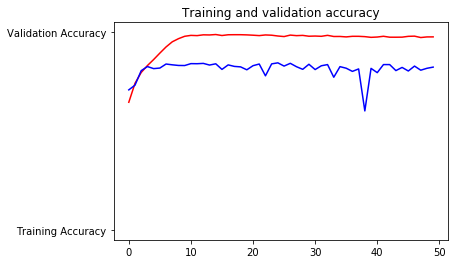

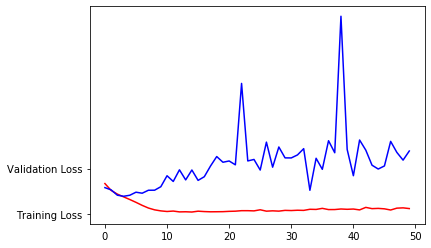

<Figure size 432x288 with 0 Axes>

In [26]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [53]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing
import numpy as np
from PIL import Image
import imageio
from skimage.transform import resize
from keras.preprocessing import image

my_image = "cat.jpg" # change this to the name of your image file 

path = "test_image/" + my_image
# image = np.array(imageio.imread(path))
# image = image/255

# plt.imshow(image)
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("This is a dog")
else:
    print("This is a cat")

[1.]
This is a dog
